In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
life_expectancy_clean = "resources/life_expectancy_clean.csv"

life_expectancy = pd.read_csv(life_expectancy_clean)

In [4]:
life_expectancy.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.28%,65.0,1154,...,6.0,8.16,65.0,0.1,584.259,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.52%,62.0,492,...,58.0,8.18,62.0,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.22%,64.0,430,...,62.0,8.13,64.0,0.1,631.745,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.18%,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.10%,68.0,3013,...,68.0,7.87,68.0,0.1,63.537,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life_expectancy.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Hepatitis B,Measles,BMI,Under-5yo Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
count,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1.657000e+03,1657.000000,1657.000000,1657.000000,1657.000000
mean,2007.850935,69.299819,168.074231,32.444176,4.513271,79.161738,2214.615570,38.173325,44.065782,83.421847,5.943808,83.972842,1.974774,1.460569e+07,4.857333,4.913096,0.631559,12.116295
std,4.086784,8.781483,125.150716,120.566224,4.029705,25.577115,10062.430303,19.748093,162.520470,22.592244,2.300552,21.762633,6.019189,7.029555e+07,4.589155,4.643184,0.182654,2.790640
min,2000.000000,44.000000,1.000000,0.000000,0.010000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.760000,74.000000,0.000000,19.500000,1.000000,81.000000,4.380000,81.000000,0.100000,1.918970e+05,1.600000,1.700000,0.511000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.760000,89.000000,15.000000,43.800000,4.000000,93.000000,5.830000,92.000000,0.100000,1.425221e+06,3.100000,3.200000,0.672000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.330000,96.000000,373.000000,55.800000,29.000000,97.000000,7.460000,97.000000,0.700000,7.592865e+06,7.000000,7.100000,0.750000,13.900000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [6]:
mean = life_expectancy.groupby('Country')["Life Expectancy"].mean()
median = life_expectancy.groupby('Country')["Life Expectancy"].median()
var = life_expectancy.groupby('Country')["Life Expectancy"].var()
std = life_expectancy.groupby('Country')["Life Expectancy"].std()
summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var,"Standard Dev.": std})
summary_statistics.head()

,Mean,Median,Variance,Standard Dev.
Country,,,,
Afghanistan,58.193750,57.8,5.667292,2.380607
Albania,75.156250,75.6,3.373292,1.836652
Algeria,74.209091,74.4,1.034909,1.017305
Angola,50.675000,50.3,6.193571,2.488689
Argentina,75.238462,75.4,0.464231,0.681345


In [7]:
life_expectancy["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
developed_countries = life_expectancy.loc[life_expectancy["Status"] == "Developed",:]
developed_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
79,Australia,2014,Developed,82.7,6.0,1,9.71,"10,769.36%",91.0,340,...,92.0,9.42,92.0,0.1,"62,214.691",2346694.0,0.6,0.6,0.936,20.4
80,Australia,2013,Developed,82.5,61.0,1,9.87,"11,734.85%",91.0,158,...,91.0,9.36,91.0,0.1,"67,792.339",23117353.0,0.6,0.6,0.933,20.3
81,Australia,2012,Developed,82.3,61.0,1,10.03,"11,715.00%",91.0,199,...,92.0,9.36,92.0,0.1,"67,677.635",22728254.0,0.6,0.6,0.930,20.1
82,Australia,2011,Developed,82.0,63.0,1,10.30,"10,986.27%",92.0,190,...,92.0,9.20,92.0,0.1,"62,245.129",223424.0,0.6,0.6,0.927,19.8
83,Australia,2010,Developed,81.9,64.0,1,10.52,"8,875.79%",92.0,70,...,92.0,9.20,92.0,0.1,"51,874.848",223175.0,0.7,0.6,0.927,19.5


In [17]:
mean_life_expectancy_alcohol_developed = developed_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Alcohol" : np.mean})                                                             

mean_life_expectancy_alcohol_developed.head()


,Country,Life Expectancy,Alcohol
0,Australia,81.907143,10.154286
1,Austria,81.480000,12.236000
2,Belgium,80.653333,11.042667
3,Bulgaria,72.740000,10.865333
4,Croatia,76.787500,12.142500


<IPython.core.display.Javascript object>


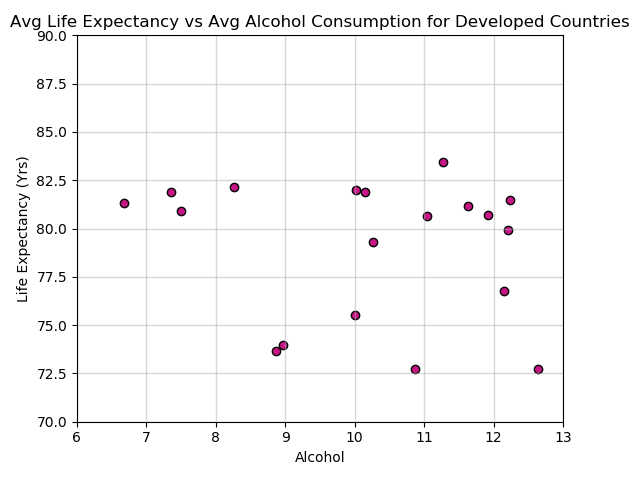

In [35]:
x = mean_life_expectancy_alcohol_developed["Alcohol"]
y = mean_life_expectancy_alcohol_developed["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumvioletred", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg Alcohol Consumption for Developed Countries")
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(70, 90)
plt.xlim(6,13)
plt.tight_layout()

In [31]:
mean_life_expectancy_bmi_developed = developed_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "BMI" : np.mean})                                                             

mean_life_expectancy_bmi_developed.head()

,Country,Life Expectancy,BMI
0,Australia,81.907143,54.928571
1,Austria,81.480000,47.666667
2,Belgium,80.653333,50.040000
3,Bulgaria,72.740000,53.753333
4,Croatia,76.787500,47.437500


<IPython.core.display.Javascript object>


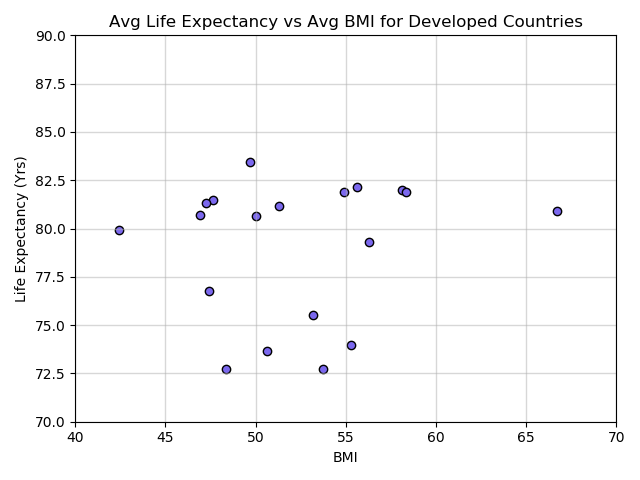

In [34]:
x = mean_life_expectancy_bmi_developed["BMI"]
y = mean_life_expectancy_bmi_developed["Life Expectancy"]
plt.scatter(x, y, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Life Expectancy vs Avg BMI for Developed Countries")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy (Yrs)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.ylim(70, 90)
plt.xlim(40,70)
plt.tight_layout()